In [19]:
# Importação das bibliotecas

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [20]:
# 1 - Importação dos dados

path = 'C:\\Users\\dsadm\\Desktop\\Nova pasta (3)\\dadosacoes.csv'
df = pd.read_csv(path)

In [21]:
# Visualização dos dados

df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


Text(0.5, 1.0, 'Nome da Ação    X    Preço da Ação')

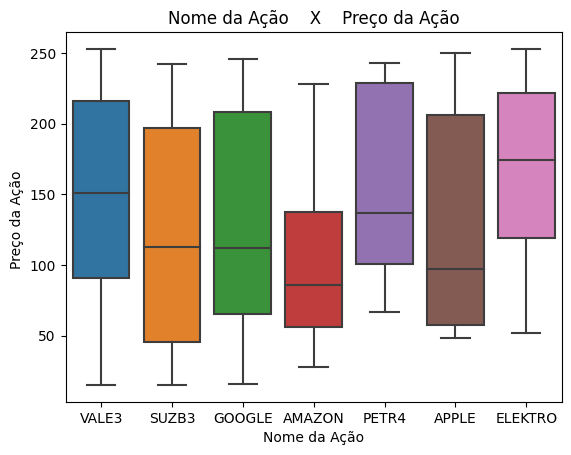

In [80]:
# 2 - Exploração dos dados

# A)
# Criação do box plot "Nome da ação X Preço da Ação"

sns.boxplot(x = df['nome ação'], y=df['preço ação R$'])
plt.xlabel('Nome da Ação')
plt.ylabel('Preço da Ação ')
plt.title("Nome da Ação    X    Preço da Ação")

Text(0.5, 1.0, 'Nome da Ação    X   Valor de Mercado')

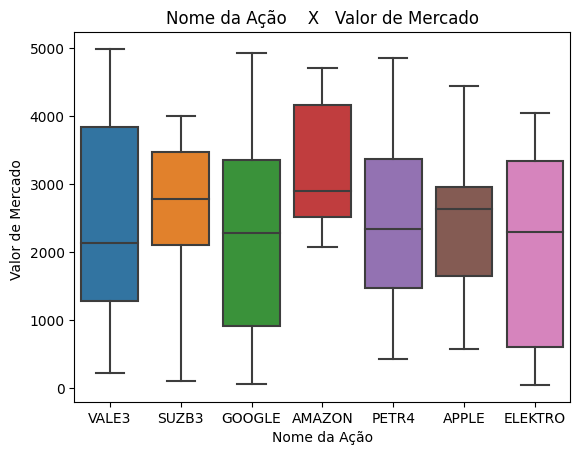

In [81]:
# Criação do box plot "Nome Ação X Valor de Mercado"

sns.boxplot(x = df['nome ação'], y=df['valor de mercado R$ -(Bilhões)']) #criar o boxplot
plt.xlabel('Nome da Ação')
plt.ylabel('Valor de Mercado ')
plt.title("Nome da Ação    X   Valor de Mercado")

In [23]:
# B)

# Utilizando o df.info() para ver as informações dos conjuntos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [24]:
# C)

# Utilizando df.describe para ver as informações do conjunto de dados

df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [26]:
# 3 - Pré processamento dos dados

dados = df

In [27]:
dados_altenativos =pd.get_dummies(dados,columns=['nome ação']) # aplica o get dummies 

In [28]:
dados_altenativos

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_AMAZON,nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,False,True,False
4,212,9,2975,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,False,True
97,99,35,980,False,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,False,True


In [55]:
# 4 - Utilizando o algoritimo K-means

kmeans = KMeans(n_clusters=4) # aplicando kmeans com 4 clusters
kmeans.fit(dados_altenativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [56]:
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

In [57]:
dados_altenativos['Grupo'] = labels # armazena os labels dos grupos restantes
grouped_data = dados_altenativos.groupby('Grupo').mean() # agrupa os grupos com a media
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         150.583333   52.000000                     3114.291667   
1         153.038462   50.307692                      553.961538   
2         142.347826   50.695652                     4238.695652   
3         101.740741   54.777778                     2101.259259   

       nome ação_AMAZON  nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Grupo                                                                           
0              0.083333         0.208333           0.083333          0.208333   
1              0.000000         0.038462           0.230769          0.384615   
2              0.217391         0.043478           0.130435          0.217391   
3              0.148148         0.185185           0.074074          0.185185   

       nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Grupo                                        

In [58]:
# A) alterando o número de clusters para 5

kmeans = KMeans(n_clusters=5) # aplicando kmeans com 5 clusters
kmeans.fit(dados_altenativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [59]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_ 

In [60]:
dados_altenativos['Grupo'] = labels 
grouped_data = dados_altenativos.groupby('Grupo').mean() 
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         150.160000   48.840000                     3757.920000   
1         151.700000   52.600000                      408.000000   
2         118.303030   54.515152                     2544.333333   
3         144.000000   58.875000                     4757.250000   
4         126.428571   47.000000                     1374.357143   

       nome ação_AMAZON  nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Grupo                                                                           
0              0.120000         0.040000           0.160000          0.240000   
1              0.000000         0.050000           0.300000          0.300000   
2              0.181818         0.181818           0.090909          0.181818   
3              0.250000         0.125000           0.000000          0.125000   
4              0.000000         0.214

In [61]:
# B) alterando o número de clusters para 8

kmeans = KMeans(n_clusters=8) # aplicando kmeans com 8 clusters
kmeans.fit(dados_altenativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [63]:
dados_altenativos['Grupo'] = labels 
grouped_data = dados_altenativos.groupby('Grupo').mean() 
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         160.000000   42.333333                      944.444444   
1         144.230769   41.076923                     4000.923077   
2         101.157895   56.684211                     2301.894737   
3         141.571429   51.571429                     2873.357143   
4         149.352941   54.529412                      347.235294   
5         144.000000   58.875000                     4757.250000   
6         103.125000   50.250000                     1624.750000   
7         156.583333   57.250000                     3494.666667   

       nome ação_AMAZON  nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Grupo                                                                           
0              0.000000         0.000000           0.222222          0.444444   
1              0.230769         0.000000           0.153846          0.30769

Text(0, 0.5, ' preço ação')

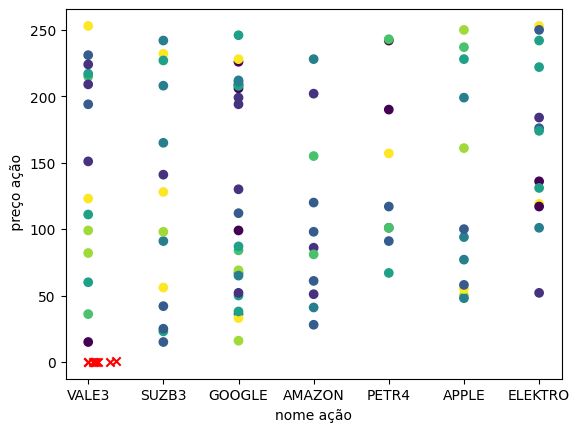

In [70]:
# 5 - Plotando a visualização dos clusters formados

# A) Visualização 2D dos clusters

plt.scatter(dados['nome ação'],dados['preço ação R$'], c= labels) 
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# " : " indica o começo e até qual linha vai

plt.xlabel("nome ação")
plt.ylabel(" preço ação")

In [72]:
print(centroids)

[[ 1.60000000e+02  4.23333333e+01  9.44444444e+02  1.38777878e-17
   0.00000000e+00  2.22222222e-01  4.44444444e-01  2.22222222e-01
   0.00000000e+00  1.11111111e-01  3.00000000e+00]
 [ 1.44230769e+02  4.10769231e+01  4.00092308e+03  2.30769231e-01
  -5.55111512e-17  1.53846154e-01  3.07692308e-01  0.00000000e+00
   7.69230769e-02  2.30769231e-01  0.00000000e+00]
 [ 1.01157895e+02  5.66842105e+01  2.30189474e+03  2.10526316e-01
   1.05263158e-01  1.05263158e-01  1.57894737e-01  1.57894737e-01
   1.57894737e-01  1.05263158e-01  2.00000000e+00]
 [ 1.41571429e+02  5.15714286e+01  2.87335714e+03  1.42857143e-01
   2.85714286e-01  7.14285714e-02  2.14285714e-01  0.00000000e+00
   2.85714286e-01  2.77555756e-17  2.00000000e+00]
 [ 1.49352941e+02  5.45294118e+01  3.47235294e+02 -4.16333634e-17
   5.88235294e-02  2.35294118e-01  3.52941176e-01  5.88235294e-02
   1.17647059e-01  1.76470588e-01  1.00000000e+00]
 [ 1.44000000e+02  5.88750000e+01  4.75725000e+03  2.50000000e-01
   1.25000000e-01  

<function matplotlib.pyplot.show(close=None, block=None)>

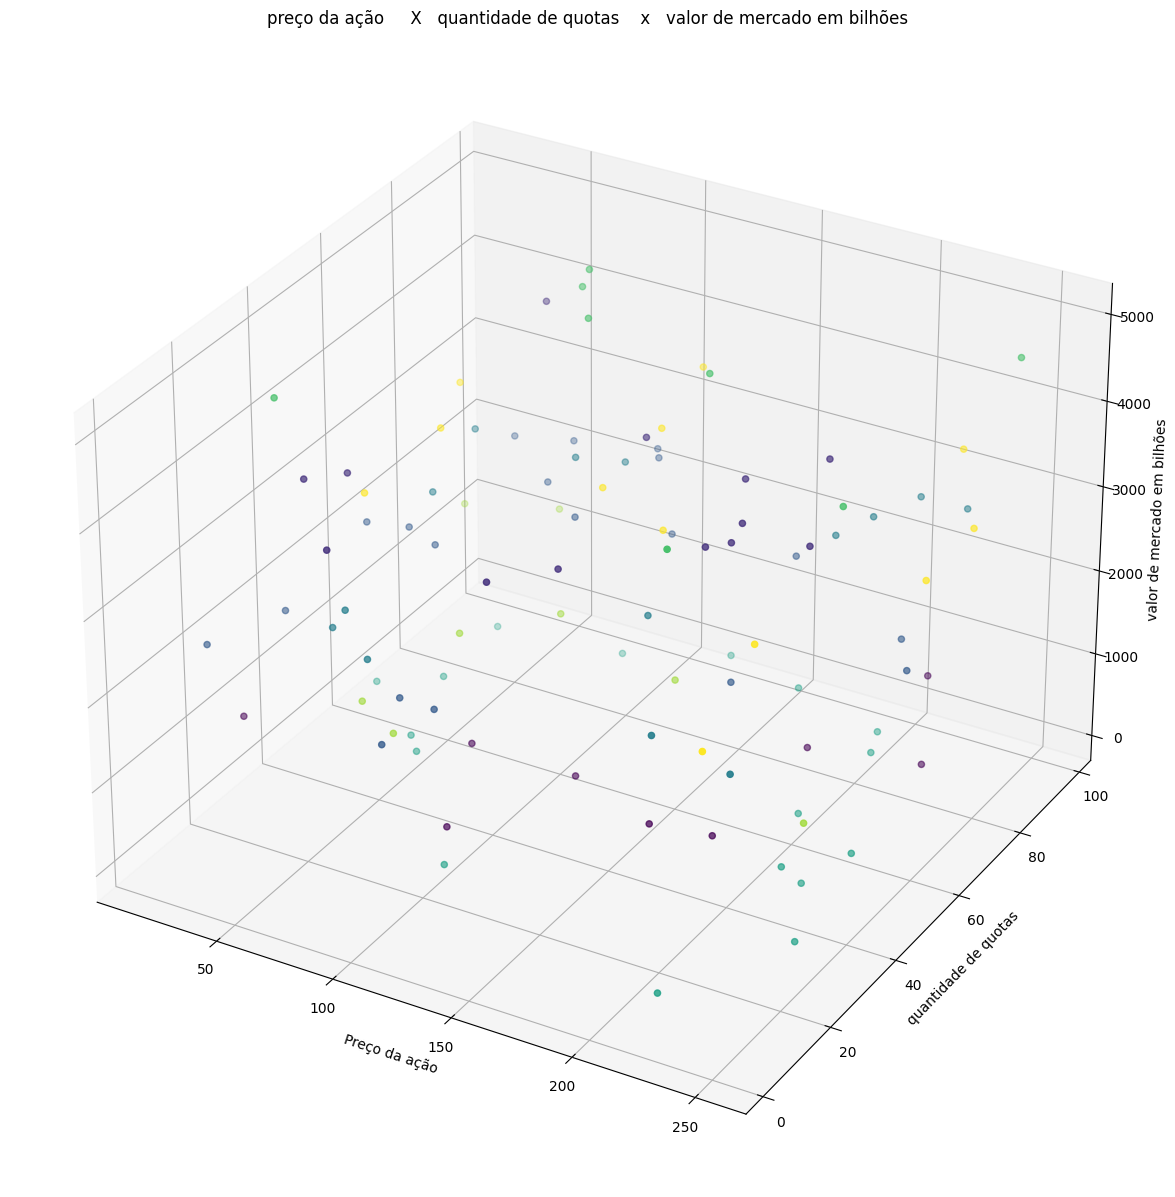

In [77]:
# B) Visualização 3D dos gráficos

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15)) # ajusta o tamanho da figura
ax = fig.add_subplot(111, projection='3d') # cria uma variável para armazenar a figura
ax.scatter(dados_altenativos['preço ação R$'], dados_altenativos['qtde cotas'], dados_altenativos['valor de mercado R$ -(Bilhões)'], c=labels)


ax.set_title('preço da ação     X   quantidade de quotas    x   valor de mercado em bilhões' )
ax.set_xlabel('Preço da ação')
ax.set_ylabel('quantidade de quotas')
ax.set_zlabel('valor de mercado em bilhões')

plt.show

In [ ]:
# Resposta da questão 5: 

# O aprendizado não supervisionado é vantajoso porque não requer treinamento. Enquanto o aprendizado supervisionado depende de dados para treinalo,
# o não supervisionado descobre padrões por conta própria, sendo útil quando os rótulos não estão disponíveis ou quando a exploração dos dados é prioritária.